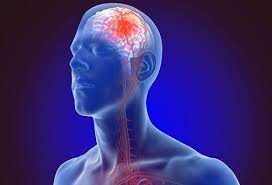

# Attribute Information

##### 1) id: unique identifier
##### 2) gender: "Male", "Female" or "Other"
##### 3) age: age of the patient
##### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
##### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
##### 6) ever_married: "No" or "Yes"
###### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
##### 38) Residence_type: "Rural" or "Urban"
###### 9) avg_glucose_level: average glucose level in blood
###### 10) bmi: body mass index
###### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
###### 12) stroke: 1 if the patient had a stroke or 0 if not
##### *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# about the data :
##### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
##### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# importing the libraries :

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

C:\Users\ELNGGAR\anaconda3\envs\menna\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Reading the data :

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#here we check if there is missing values or not 
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#here we find that there is a missing values in bmi 

# dealing with missing values :

In [8]:
#here we find that we have to use mean to deal with missing values cuz of the number os the ,issing values 

In [9]:
print(data['bmi'].mean())
print(data['bmi'].median())

28.893236911794673
28.1


In [10]:
bmi_mean=data['bmi'].mean()
data['bmi']=data['bmi'].fillna(bmi_mean)


In [11]:
data['bmi'].isnull().sum()
#here we check the data so we find that there is no missing values 

0

In [12]:
df=data.copy() #copy of our data 

<AxesSubplot:>

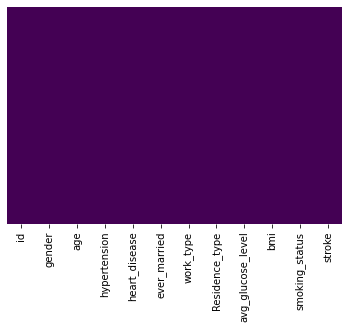

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

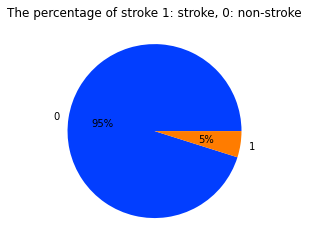

In [14]:
data = df["stroke"].value_counts()
labels = df["stroke"].value_counts().index

palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("The percentage of stroke 1: stroke, 0: non-stroke");
#There is 201 null BMI values on the dataset. Additionally the data is imbalance therefore we need to solve these issues for better results.

In [15]:
#There is 201 null BMI values on the dataset. Additionally the data is imbalance therefore we need to solve these issues for better results.

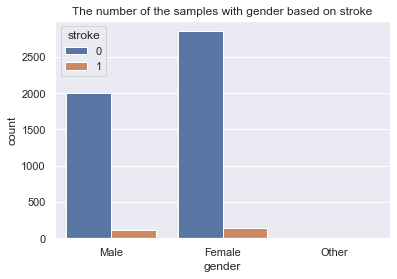

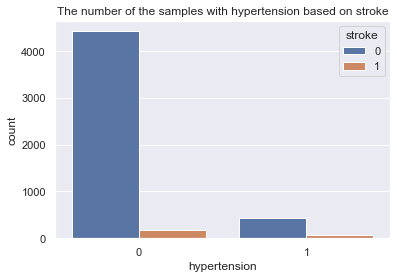

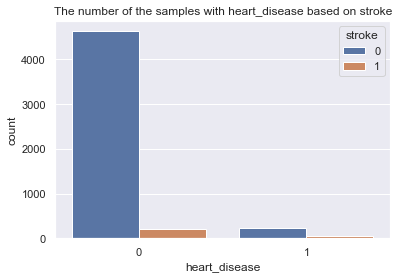

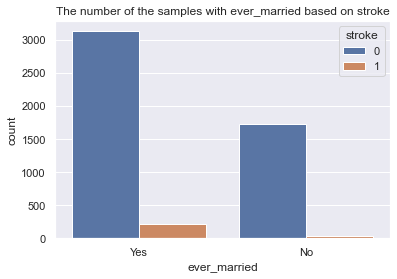

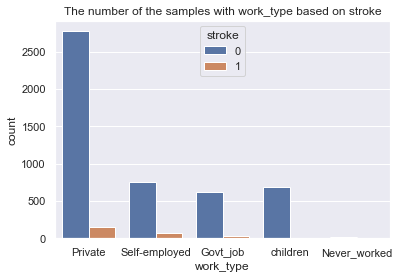

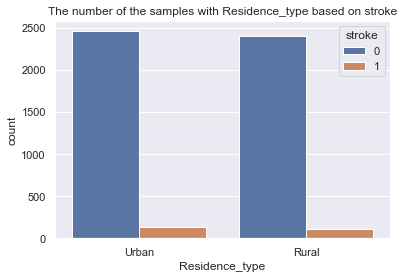

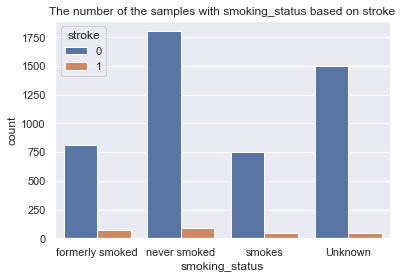

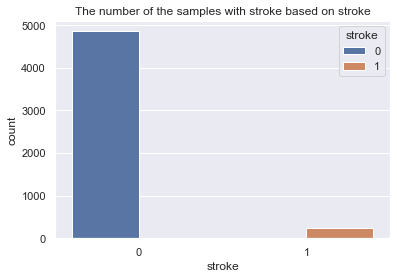

In [16]:
# a short look into the number of each categorical features grouped by stroke variable.
sns.set_theme(style = 'darkgrid')
for i in df.columns[1:]:  # exclude stroke column
    if (df[i].dtype == 'object') or (df[i].dtype == 'int64'):
            sns.countplot(data = df, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

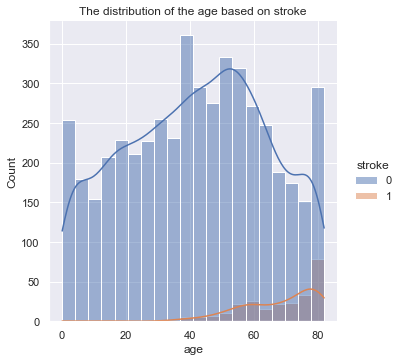

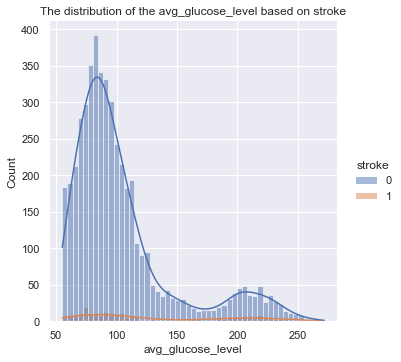

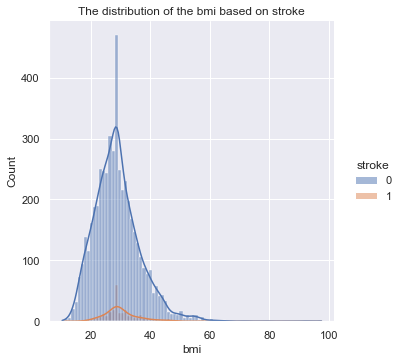

In [17]:
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]: # exclude stroke column
    if df[i].dtype == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(i))
            plt.show()

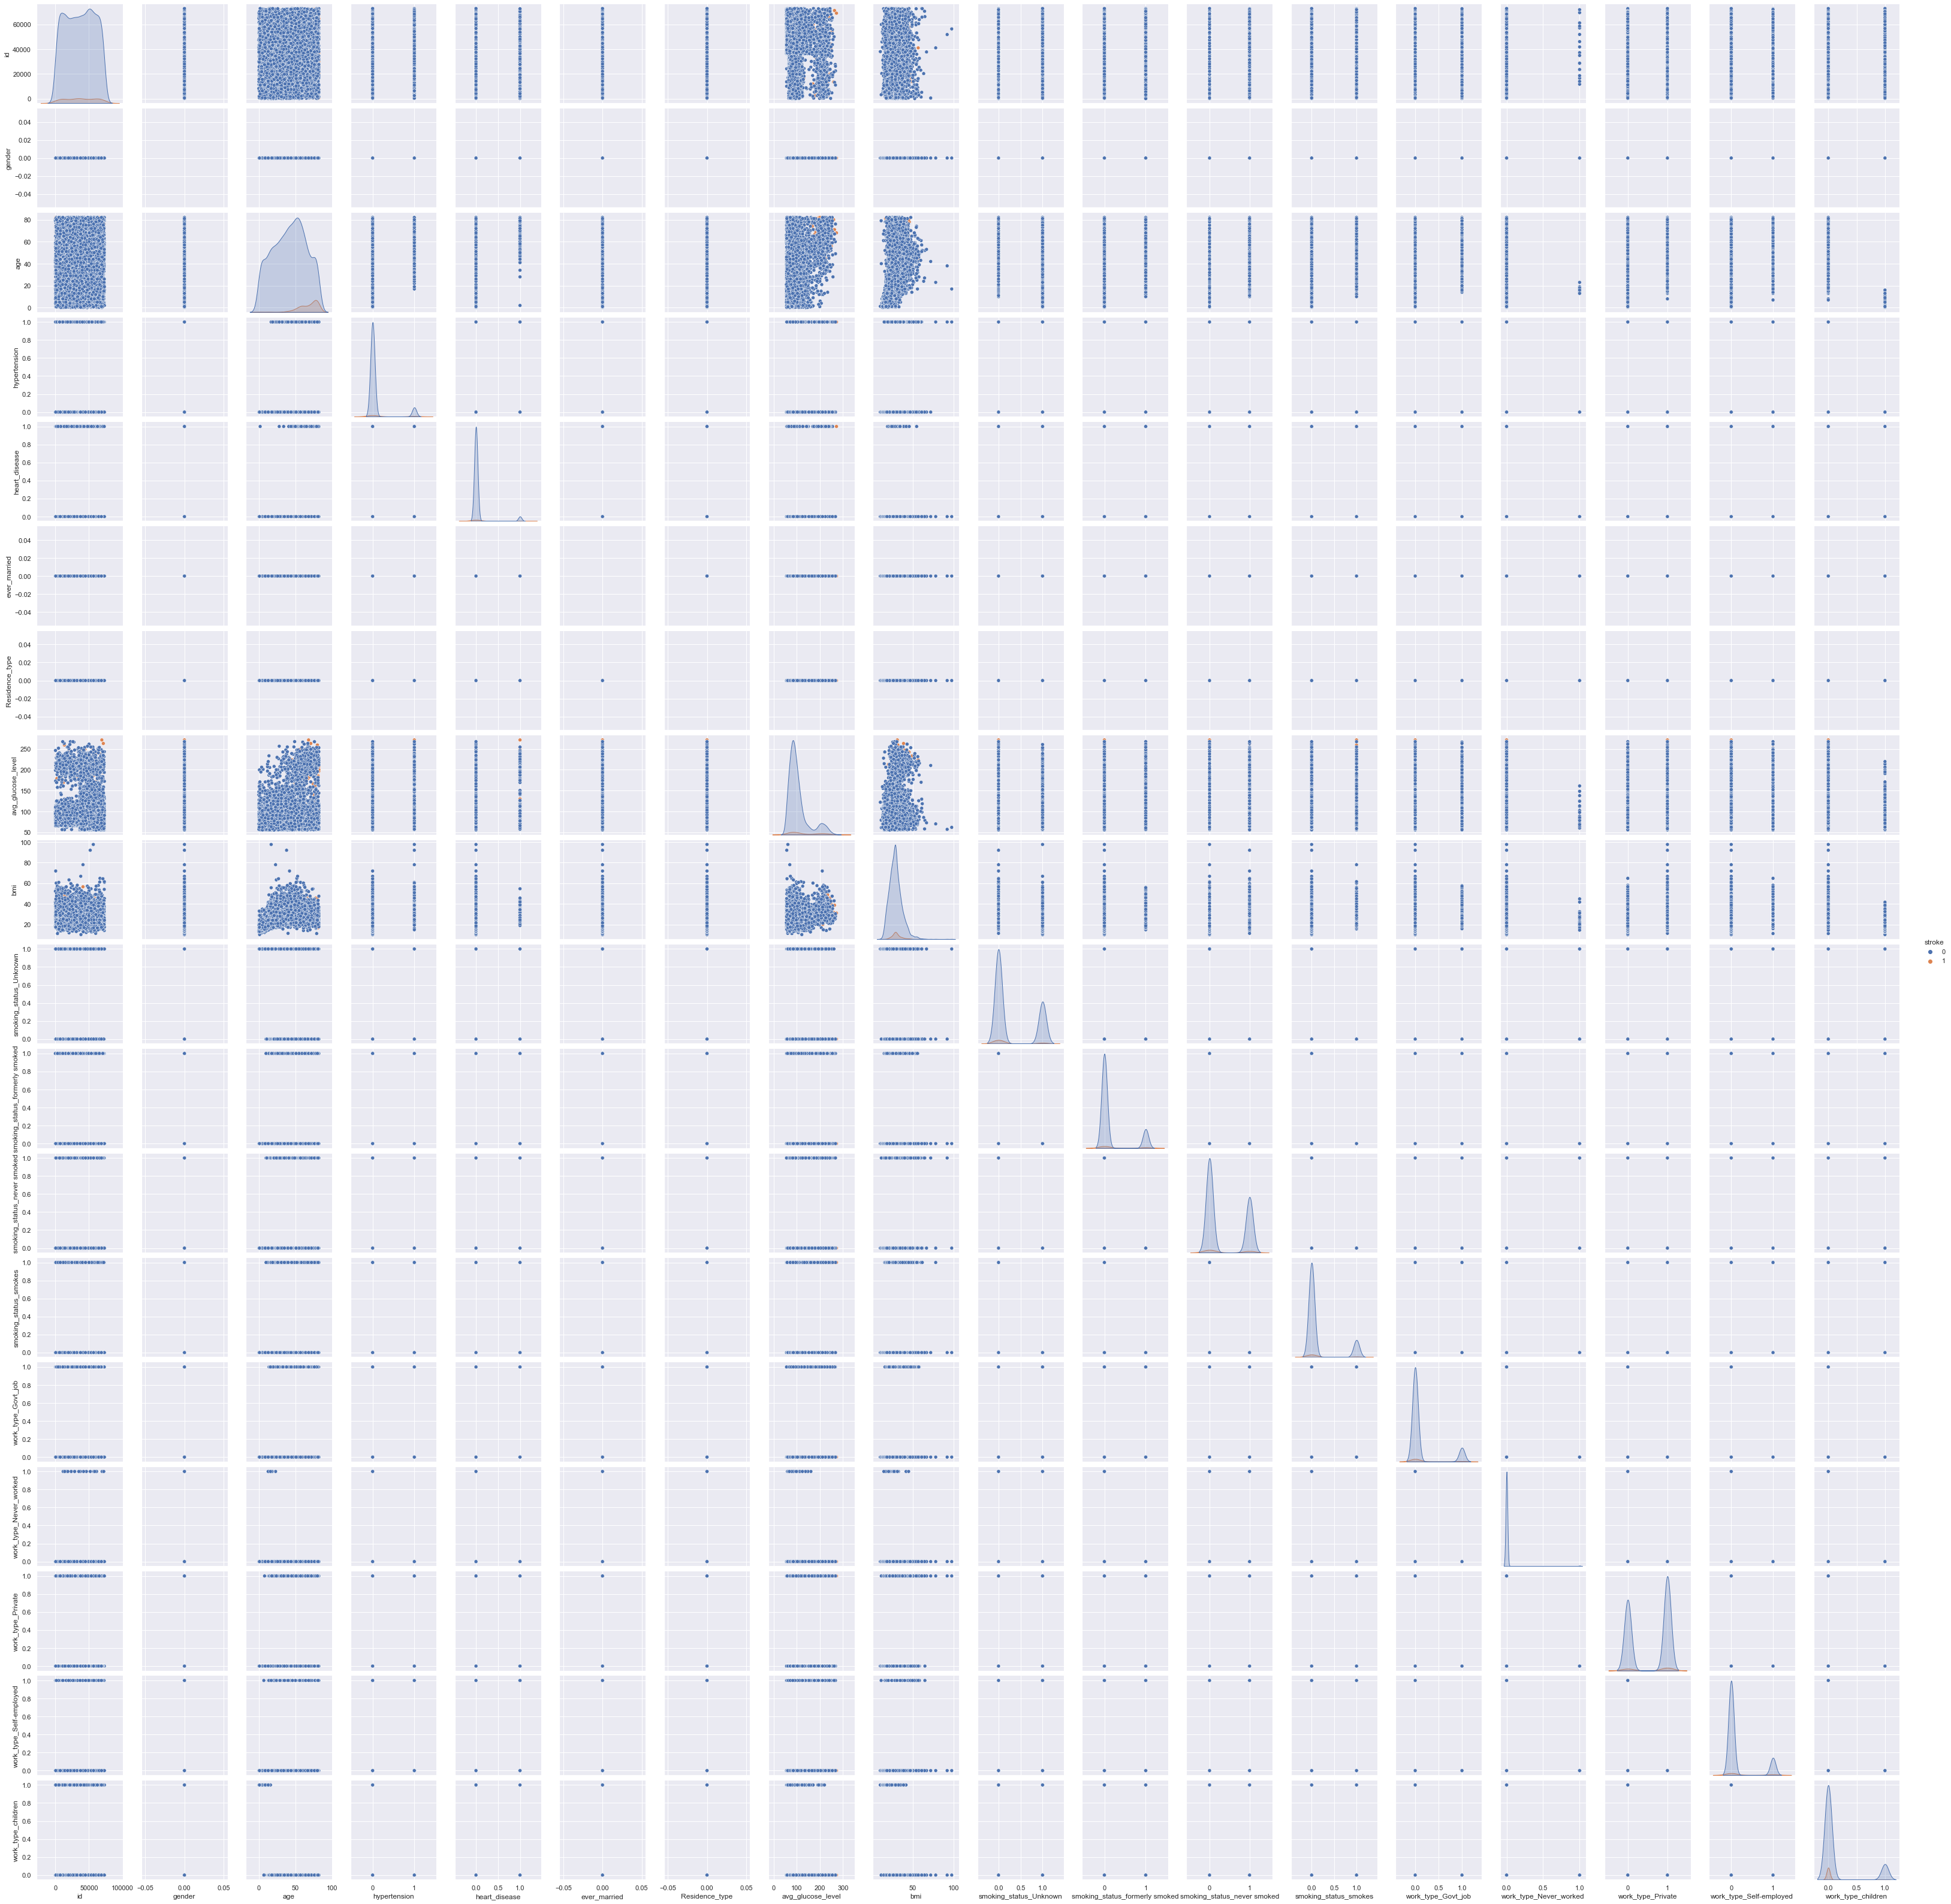

In [44]:
sns.pairplot(data=df,hue='stroke')

# split the data :

In [18]:
x_data = df.drop("stroke" , axis = 1).values
y_data = df["stroke"]

In [19]:
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.25 , random_state=42)

In [20]:
obj_cols=['gender', 'ever_married', 'Residence_type']
#sparete the missing values 
lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(df.loc[:,i].value_counts())
    df[i] = lb.fit_transform(df[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male' 'Other']
Value Counts of column:ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

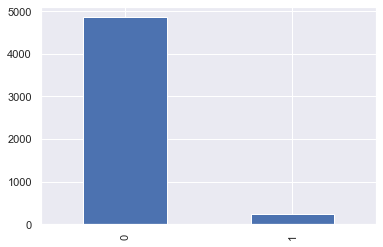

In [21]:
##### show the value counts of the calsses in the target
#we can find data impalance
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

# encoding :

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [24]:
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [25]:
df = df.dropna()

In [26]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# training
def best_split(n):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=n)
    pipe.fit(X_train,y_train) 

    # predicting

    y_pred = pipe.predict(X_test)
    accuracy = round(accuracy_score(y_test,y_pred)*100,2)
    print('Accuracy is ',accuracy)
    return accuracy



In [29]:
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(df.loc[:,i].value_counts())
    df[i] = lb.fit_transform(df[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
0    5110
Name: gender, dtype: int64
The classes which labeled from 0 are:  [0]
Value Counts of column:ever_married
0    5110
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  [0]
Value Counts of column:Residence_type
0    5110
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  [0]


In [30]:
DF=pd.get_dummies(data)

In [31]:
#oversampling
oversample = SMOTE()
X_data_balanced, y_data_balanced = oversample.fit_resample(X_train, y_train.ravel())

In [32]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']
X_over, y_over = oversample.fit_resample(X, y)

1    4861
0    4861
Name: stroke, dtype: int64


<AxesSubplot:>

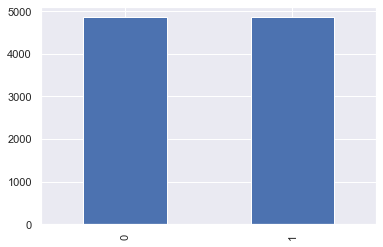

In [33]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

### Models to be used for ML
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier

models = [('Logistic Regression', LogisticRegression()),
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Linear Discriminant Analyzer', LinearDiscriminantAnalysis()),
          ('Ada Boost', AdaBoostClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('Support Vector Classifier', SVC(probability = True)),
          ('XG Boost', XGBClassifier())]

models_score = []
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    
    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()

 Barplot to show the test accuracy scores of each algorithms
plt.figure(figsize = (12, 6))
sns.barplot(x = np.array(models_score)[:, 0], y=np.array(models_score)[:, 1].astype('float64'))
plt.xticks(rotation = 45);

In [34]:
#here i will do modeling for the second way to show the precesion and accuracy and finally recall 

In [35]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[con_cols]=scaler.fit_transform(X_train[con_cols])
X_test[con_cols]=scaler.transform(X_test[con_cols])
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
5290,38829,0,1.219644,0,0,0,0,-1.071242,0.523201,0,0,1,0,0,0,1,0,0
9337,7547,0,0.858693,0,0,0,0,-0.824444,0.250394,0,0,0,1,0,0,1,0,0
4515,31426,0,1.174525,1,0,0,0,1.764938,1.987745,0,0,1,0,1,0,0,0,0
1136,35231,0,0.317266,0,0,0,0,-0.485731,-0.438803,1,0,0,0,1,0,0,0,0
4008,50372,0,0.091672,0,0,0,0,2.079767,0.853442,0,0,1,0,0,0,1,0,0


# modeling :

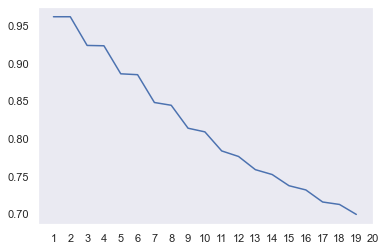

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

# 1- knn :

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1459
           1       0.93      1.00      0.97      1458

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.96      2917
weighted avg       0.97      0.97      0.96      2917



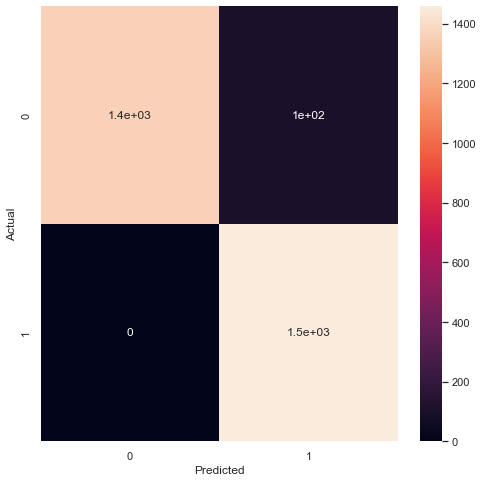

In [39]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

# 2-Logistic regression :

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1459
           1       0.74      0.82      0.78      1458

    accuracy                           0.76      2917
   macro avg       0.77      0.76      0.76      2917
weighted avg       0.77      0.76      0.76      2917



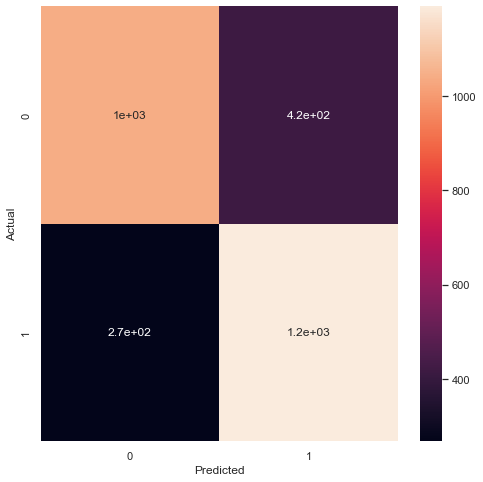

In [40]:
import warnings 
warnings.filterwarnings('ignore')
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))



# 3- random forest :

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1459
           1       0.99      1.00      0.99      1458

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



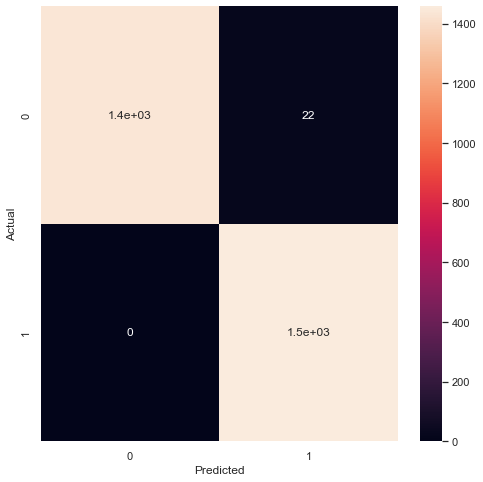

In [41]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))

In [47]:
import pickle

with open('rcv.pkl', 'wb') as model_file:
    pickle.dump(rcv, model_file)

# 4- Gradient boostingclassifier :

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1459
           1       0.94      1.00      0.97      1458

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



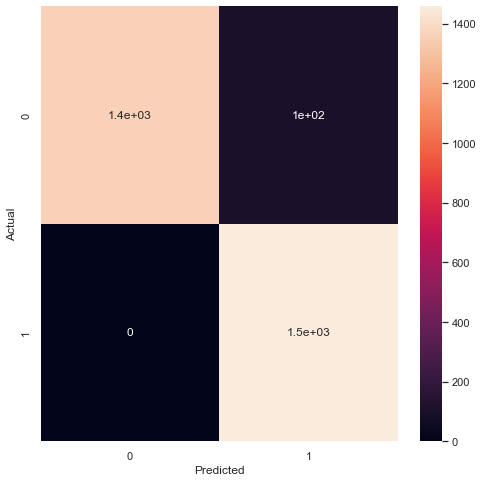

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))

# 5- random search :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1459
           1       1.00      1.00      1.00      1458

    accuracy                           1.00      2917
   macro avg       1.00      1.00      1.00      2917
weighted avg       1.00      1.00      1.00      2917



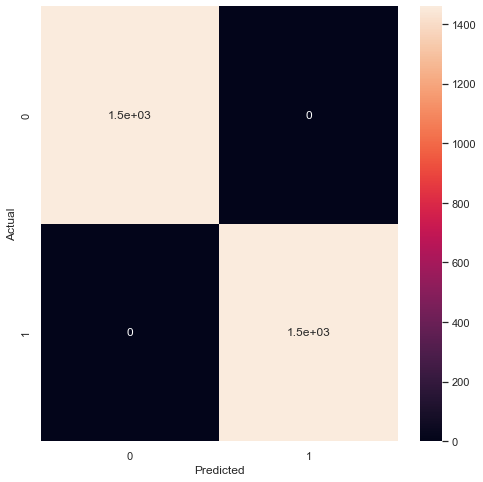

In [43]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

# conclusion :
    here we find that the best model is random forest with acc 99%